# The Sparks Foundation
## Data Science & Business Analytics Tasks - July 2021
### Task 2 - Prediction using Unsupervised ML
### Task: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 
#### Submitted by: Anuya Thakur

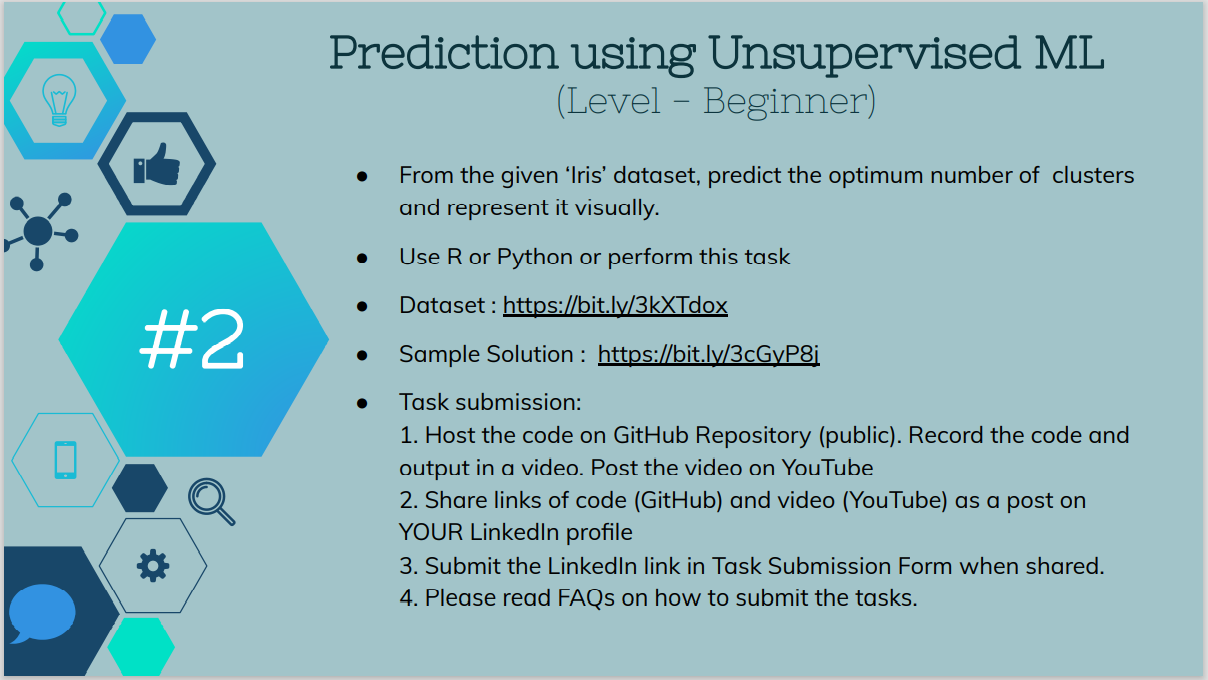

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

### Reading the Dataset

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

#### Getting some information from the dataset

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.shape

(150, 4)

The dataset contains 150 rows and 4 Columns

In [5]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

The dataset has no missing values.

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Performing some EDA

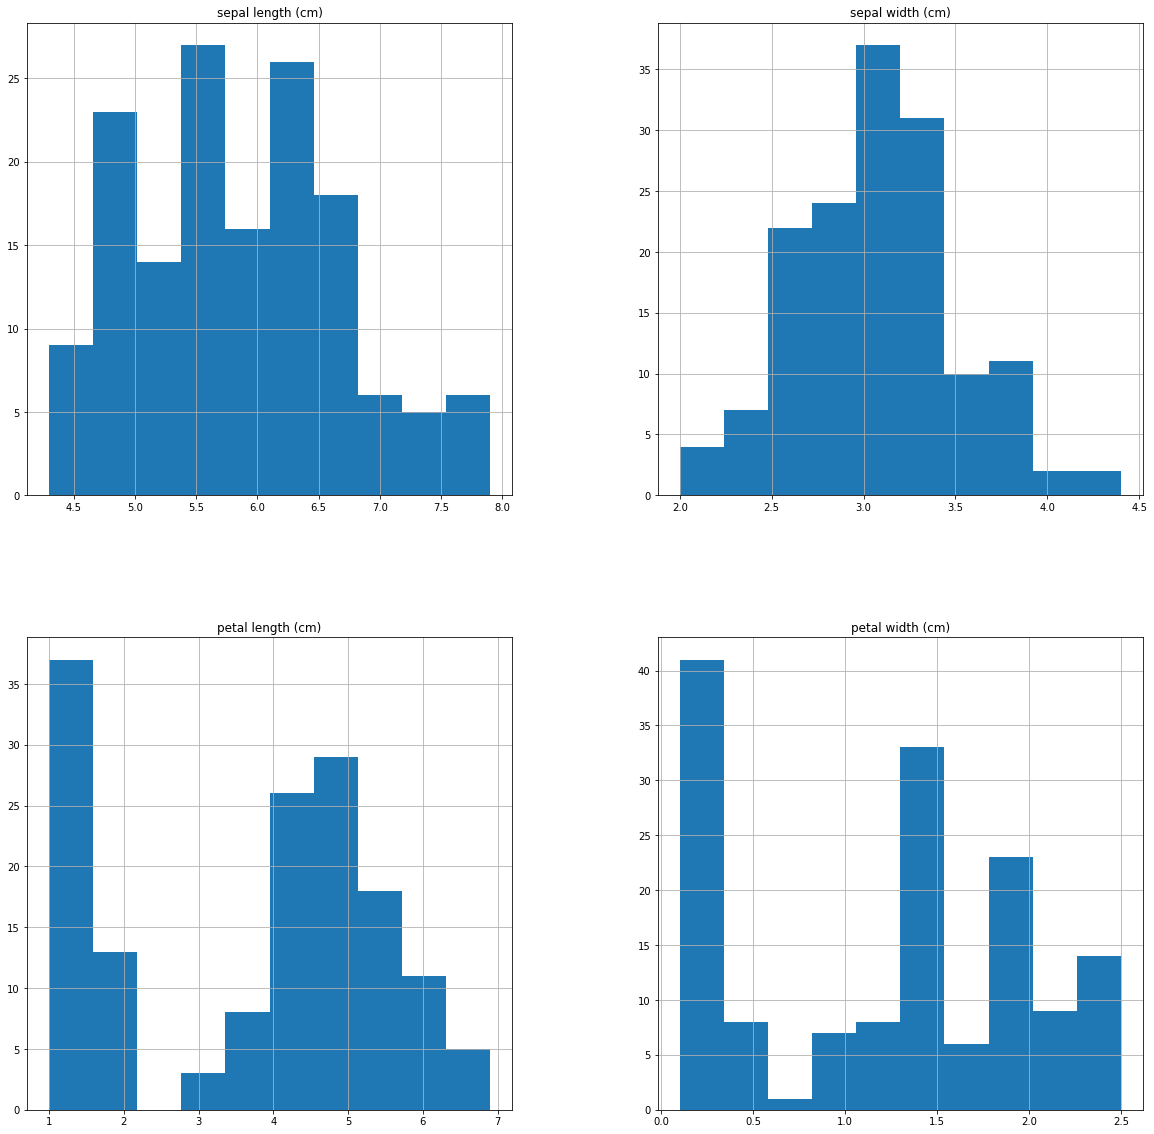

In [7]:
p = df.hist(figsize = (20,20))

### Checking for Correlation

<AxesSubplot:>

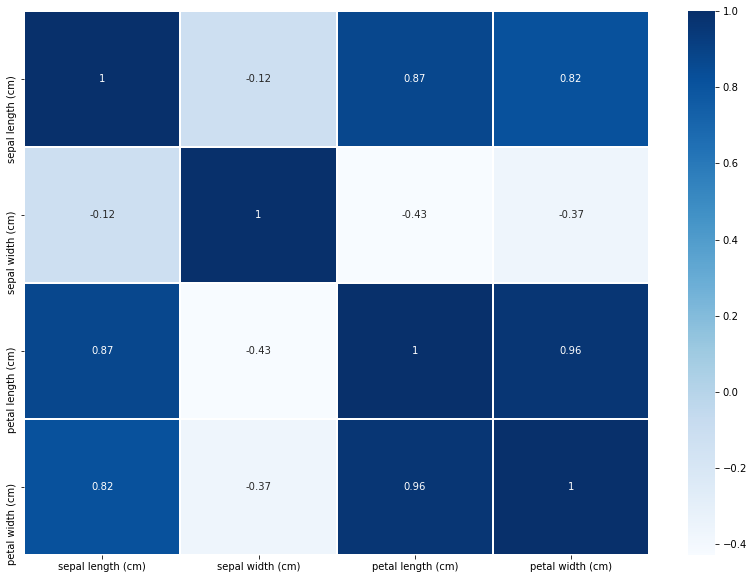

In [8]:
colormap=plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),cmap=colormap, annot=True, linewidth=0.9)

Since Petal length and Petal width are highly correlated we drop one of them.

In [9]:
drop_elements=['petal width (cm)']
df=df.drop(drop_elements, axis=1)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


We are plotting the Heatmap again to check if any of the variables are highly correlated.

<AxesSubplot:>

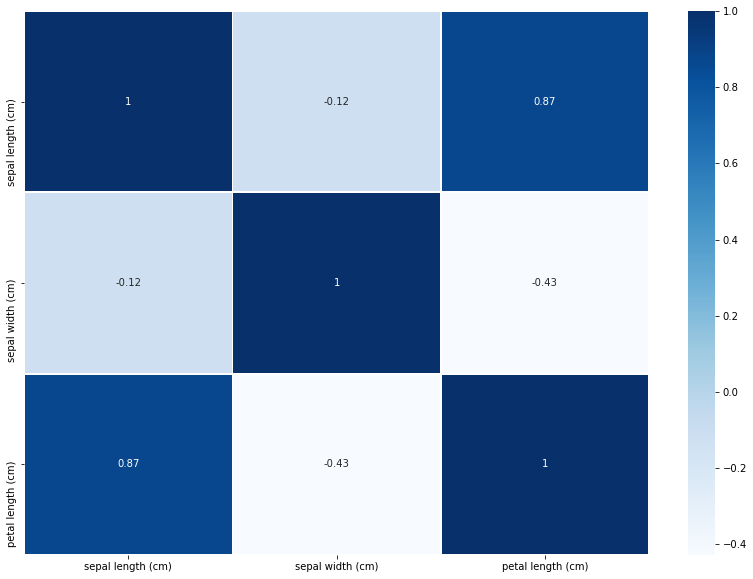

In [11]:
colormap=plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),cmap=colormap, annot=True, linewidth=0.9)

Since none of the Variables have Correlation above 0.95 we donot drop any variable and move ahead with the Clustering.

### Finding the Optimal Number of Clusters using Elbow Method

In [12]:
X = df.iloc[:, [0, 1, 2]].values

C:\Users\Anuya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


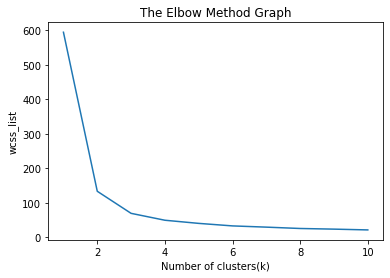

In [13]:
from sklearn.cluster import KMeans

wcss_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++' , random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11),wcss_list)
plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters(k)")
plt.ylabel("wcss_list")
plt.show()

This shows that the Optimal Number of Clusters is 3

### Clustering using K-Means

In [14]:
km=KMeans(n_clusters=3, init='k-means++',random_state=42)
y_pred=km.fit_predict(X)

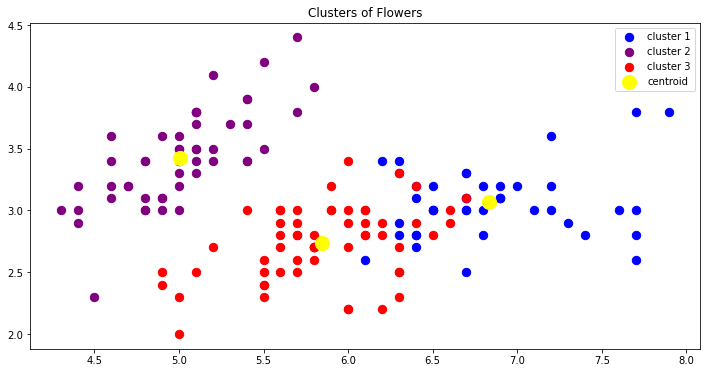

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=70,c='blue',label='cluster 1') #0 shows low and 1 shows High
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=70,c='purple',label='cluster 2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=70,c='red',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,c='yellow', label='centroid')
plt.title('Clusters of Flowers')
plt.legend()
plt.show()

Here we have 3 Clusters represented by 3 colors and the Centroid marked as yellow

### Clustering using Hierarchical Algorithm

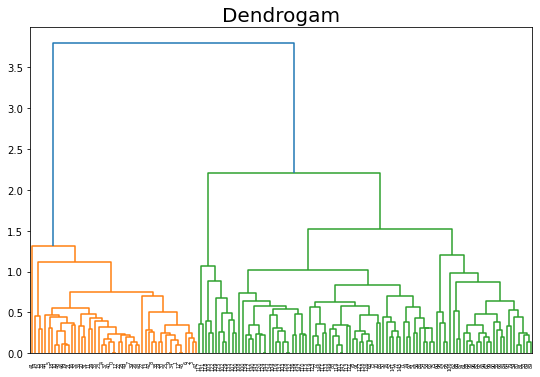

In [16]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(9,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.title('Dendrogam', fontsize = 20)
plt.show()

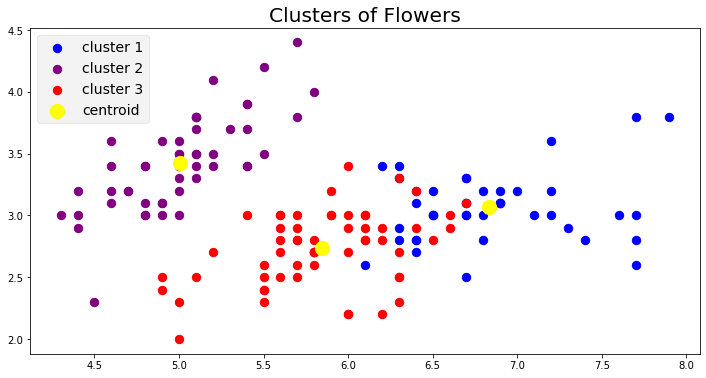

In [17]:
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(12,6))
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=70,c='blue',label='cluster 1') 
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=70,c='purple',label='cluster 2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=70,c='red',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,c='yellow', label='centroid')

plt.style.use('fivethirtyeight')
plt.title('Clusters of Flowers')
plt.legend()
plt.show()

We get almost similar clusters using K-Means and Average Link algorithms